In [1]:
!pip install scikit-learn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
path = 'cut_taxi_dataset10000.csv'
df = pd.read_csv(path)

In [5]:
# Преобразование колонок с временем в формат datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,615190,1,2015-01-18 13:41:32,2015-01-18 13:48:20,1,0.70,-73.997345,40.766876,1,N,-73.995995,40.760822,2,6.0,0.0,0.5,0.0,0.0,0.3,6.8
1,4664939,1,2015-01-24 13:27:54,2015-01-24 13:29:25,1,0.30,-74.009911,40.722195,1,N,-74.006523,40.718830,1,3.5,0.0,0.5,1.0,0.0,0.3,5.3
2,6907757,1,2015-01-13 09:14:39,2015-01-13 09:21:22,1,1.10,-73.972107,40.759087,1,N,-73.961357,40.774250,1,7.0,0.0,0.5,3.0,0.0,0.3,10.8
3,2677691,1,2015-01-01 09:37:40,2015-01-01 09:45:39,1,1.90,-73.980270,40.742779,1,N,-74.004913,40.740917,1,8.5,0.0,0.5,1.0,0.0,0.0,10.3
4,6538830,2,2015-01-09 09:18:39,2015-01-09 09:35:01,1,1.64,-73.987671,40.770126,1,N,-73.980522,40.760876,1,11.0,0.0,0.5,2.0,0.0,0.3,13.8


In [7]:
df_2 = pd.read_csv('student_health_data.csv')

In [8]:
df_2.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [10]:
df_2.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


#### 1 Задание
Продемонстрировать применение для проверки различных гипотез и
различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
a.
Стьюдента, включая односторонние варианты, когда
проверяемая нулевая гипотеза заключается в том, что одно из сравниваемыхсредних значений больше (или меньше) другого. Реализовать оценку
мощности критериев при заданном объеме выборки или определения
объема выборки для достижения заданной мощности;
b.
Уилкоксона-Манна-Уитни (ранговые);
c.
Фишера, Левене, Бартлетта, Флигнера-Килина (проверка
гипотез об однородности дисперсий).

In [11]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import levene, bartlett, fligner, mannwhitneyu

In [12]:
alpha_levels = [0.1, 0.04, 0.01]

In [13]:
df["date"] = df["tpep_pickup_datetime"].dt.date
trips_per_day = df.groupby("date").size().reset_index(name="trip_count")


In [14]:
trips_per_day.date = pd.to_datetime(trips_per_day.date)
trips_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        31 non-null     datetime64[ns]
 1   trip_count  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [15]:
trips_per_day.to_csv('trips_per_day.csv')

In [16]:
ks_stat, ks_p = stats.kstest(trips_per_day.trip_count, 'norm', args=(np.mean(trips_per_day.trip_count), np.std(trips_per_day.trip_count)))
print(f"Kolmogorov-Smirnov test: Stat={ks_stat}, p-value={ks_p}")

Kolmogorov-Smirnov test: Stat=0.23243875931840002, p-value=0.05899621490375617


In [17]:
data = trips_per_day

group_1 = data[data['date'].dt.day <= 15]['trip_count']
group_2 = data[data['date'].dt.day > 15]['trip_count']

In [18]:
# 1. Критерий Стьюдента для независимых выборок
  
# Двусторонний тест
t_stat, p_value_2 = stats.ttest_ind(group_1, group_2, equal_var=False)
print(f"Двусторонний тест: t-статистика: {t_stat:.2f}, p-значение: {p_value_2:.4f}")


# Односторонний тест (H0: mean(group_1) <= mean(group_2))
t_stat, p_value_1 = stats.ttest_ind(group_1, group_2, alternative='less', equal_var=False)
print(f"Односторонний тест (mean(group_1) <= mean(group_2)): t-статистика: {t_stat:.2f}, p-значение: {p_value_1:.4f}")

for alpha in alpha_levels:
    print(f"\nДоверительный уровень: {1-alpha}")

    print(f"Двусторонний тест:")
    if p_value_2 < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")

    print(f"Односторонний тест:")
    if p_value_1 < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")

print("\n")

Двусторонний тест: t-статистика: 0.49, p-значение: 0.6262
Односторонний тест (mean(group_1) <= mean(group_2)): t-статистика: 0.49, p-значение: 0.6869

Доверительный уровень: 0.9
Двусторонний тест:
Не отвергаем нулевую гипотезу
Односторонний тест:
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.96
Двусторонний тест:
Не отвергаем нулевую гипотезу
Односторонний тест:
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.99
Двусторонний тест:
Не отвергаем нулевую гипотезу
Односторонний тест:
Не отвергаем нулевую гипотезу




In [19]:
# 2. Критерий Уилкоксона-Манна-Уитни

stat, p_value = mannwhitneyu(group_1, group_2, alternative='two-sided')
print(f"Критерий Уилкоксона-Манна-Уитни: стат={stat:.2f}, p={p_value:.4f}")

for alpha in alpha_levels:
    print(f"\nДоверительный уровень: {1-alpha}")
    
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу (различия между группами значимы)")
    else:
        print("Не отвергаем нулевую гипотезу")

print("\n")

Критерий Уилкоксона-Манна-Уитни: стат=93.00, p=0.2948

Доверительный уровень: 0.9
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.96
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.99
Не отвергаем нулевую гипотезу




In [20]:
# 3. Проверка равенства дисперсий (Левена, Бартлетт, Флигнера-Килина)
levene_stat, levene_p = levene(group_1, group_2)
bartlett_stat, bartlett_p = bartlett(group_1, group_2)
fligner_stat, fligner_p = fligner(group_1, group_2)
print(f"Критерий Левена: стат={levene_stat:.2f}, p={levene_p:.4f}")
print(f"Критерий Бартлетта: стат={bartlett_stat:.2f}, p={bartlett_p:.4f}")
print(f"Критерий Флигнера-Килина: стат={fligner_stat:.2f}, p={fligner_p:.4f}")
for alpha in alpha_levels:
    print(f"\nДоверительный уровень: {1-alpha}")
    print(f"Критерий Левена:")
    if levene_p < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")
    print(f"Критерий Бартлетта:")
    if bartlett_p < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")
    print(f"Критерий Флигнера-Килина:")
    if fligner_p < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")

print("\n")

Критерий Левена: стат=1.01, p=0.3231
Критерий Бартлетта: стат=8.15, p=0.0043
Критерий Флигнера-Килина: стат=0.02, p=0.8792

Доверительный уровень: 0.9
Критерий Левена:
Не отвергаем нулевую гипотезу
Критерий Бартлетта:
Отвергаем нулевую гипотезу
Критерий Флигнера-Килина:
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.96
Критерий Левена:
Не отвергаем нулевую гипотезу
Критерий Бартлетта:
Отвергаем нулевую гипотезу
Критерий Флигнера-Килина:
Не отвергаем нулевую гипотезу

Доверительный уровень: 0.99
Критерий Левена:
Не отвергаем нулевую гипотезу
Критерий Бартлетта:
Отвергаем нулевую гипотезу
Критерий Флигнера-Килина:
Не отвергаем нулевую гипотезу




In [21]:
# 4. Оценка мощности критерия Стьюдента
# Зададим параметры: размер выборки, эффект, стандартное отклонение
analysis = TTestIndPower()
effect_size = (np.mean(group_1) - np.mean(group_2)) / np.sqrt(
    (np.var(group_1, ddof=1) + np.var(group_2, ddof=1)) / 2
)

power = analysis.power(effect_size=effect_size, nobs1=len(group_1), alpha=0.05)
print(f"Мощность критерия Стьюдента: {power:.2f}")

# Определение необходимого объема выборки для мощности 0.8
sample_size = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='two-sided')
print(f"Необходимый объем выборки для мощности 0.8: {sample_size:.0f}")

Мощность критерия Стьюдента: 0.08
Необходимый объем выборки для мощности 0.8: 509


#### 2 Задание
Исследовать корреляционные взаимосвязи в данных с помощью
коэффициентов корреляции Пирсона, Спирмена и Кендалла.

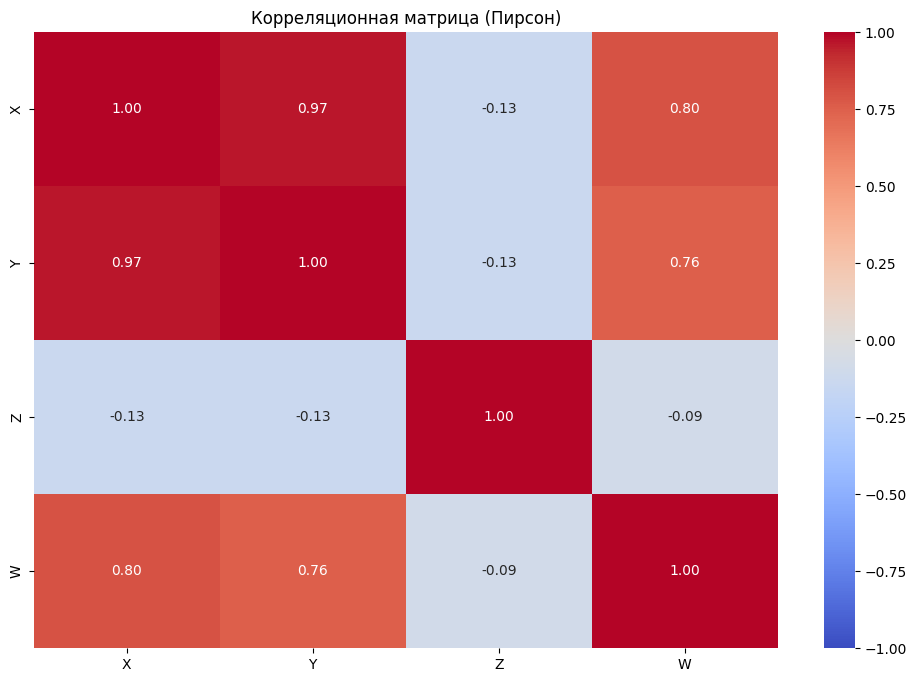

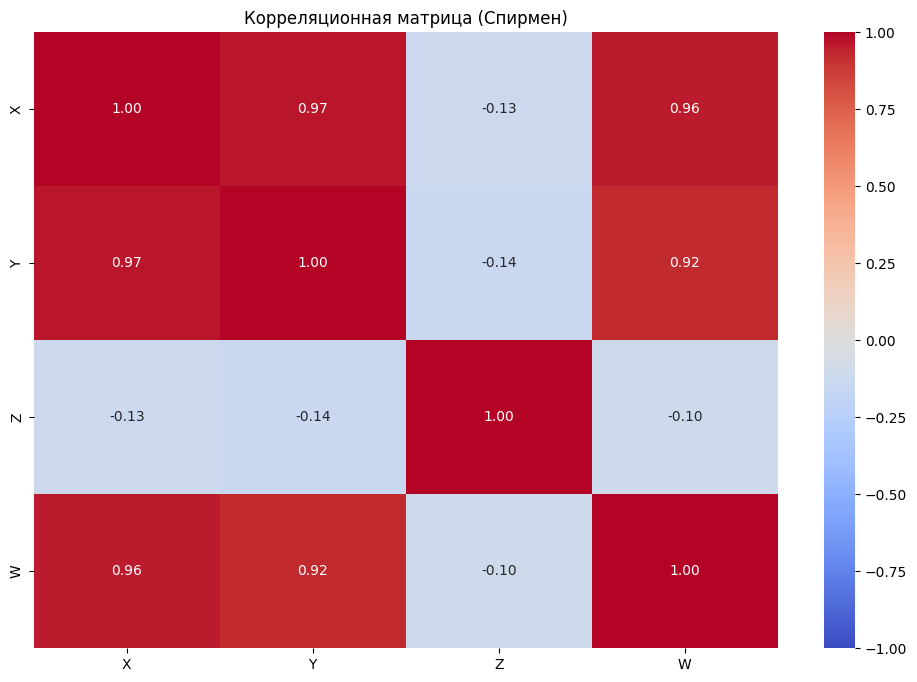

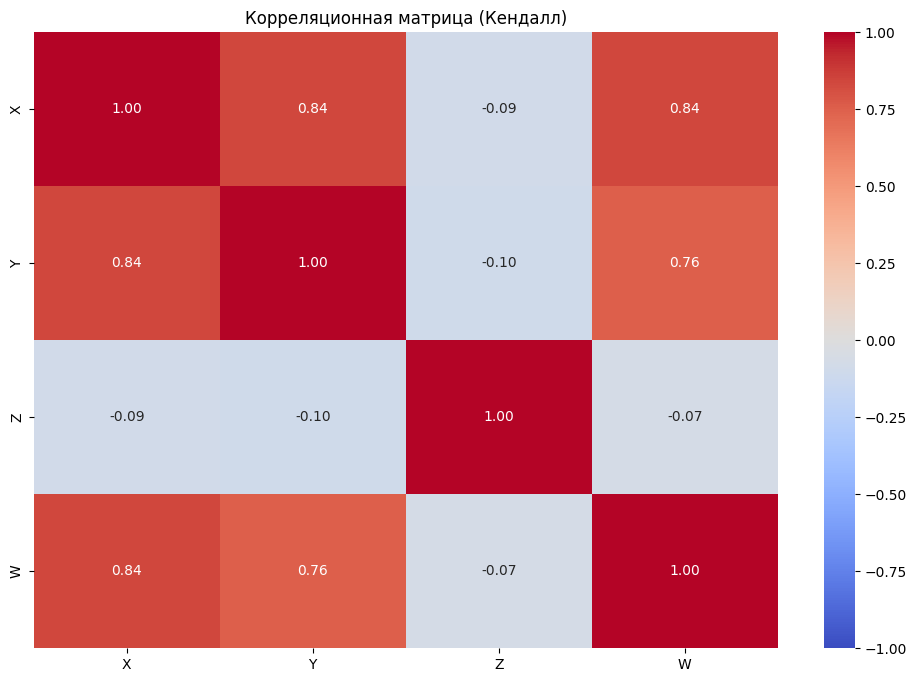

In [22]:
# Генерация нормальных данных с различными зависимостями
np.random.seed(42)
X = np.random.normal(size=200)
Y = X * 2 + np.random.normal(scale=0.5, size=200)
Z = np.random.normal(size=200)
W = np.exp(X) + np.random.normal(scale=0.2, size=200)

# Создаем DataFrame
numeric_columns = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z, 'W': W})

# Корреляционные матрицы
correlation_pearson = numeric_columns.corr(method='pearson')
correlation_spearman = numeric_columns.corr(method='spearman')
correlation_kendall = numeric_columns.corr(method='kendall')

# Функция для построения тепловой карты
def plot_correlation_heatmap(correlation_matrix, title, filename):
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()
    #plt.savefig(filename)

# Построение тепловых карт для Пирсона, Спирмена и Кендалла
plot_correlation_heatmap(correlation_pearson, "Корреляционная матрица (Пирсон)", 'pearson_g.png')
plot_correlation_heatmap(correlation_spearman, "Корреляционная матрица (Спирмен)", 'spearman_g.png')
plot_correlation_heatmap(correlation_kendall, "Корреляционная матрица (Кендалл)", 'kendall_g.png')

In [23]:
pairs = [('X', 'Y'), ('X', 'Z'), ('X', 'W'), ('Y', 'Z'), ('Y', 'W'), ('Z', 'W')]
print("\nКоэффициенты корреляции между переменными:")
for var1, var2 in pairs:
    pearson_corr = numeric_columns[var1].corr(numeric_columns[var2], method='pearson')
    spearman_corr = numeric_columns[var1].corr(numeric_columns[var2], method='spearman')
    kendall_corr = numeric_columns[var1].corr(numeric_columns[var2], method='kendall')
    print(f"{var1} и {var2}: Пирсон={pearson_corr:.2f}, Спирмен={spearman_corr:.2f}, Кендалл={kendall_corr:.2f}")


Коэффициенты корреляции между переменными:
X и Y: Пирсон=0.97, Спирмен=0.97, Кендалл=0.84
X и Z: Пирсон=-0.13, Спирмен=-0.13, Кендалл=-0.09
X и W: Пирсон=0.80, Спирмен=0.96, Кендалл=0.84
Y и Z: Пирсон=-0.13, Спирмен=-0.14, Кендалл=-0.10
Y и W: Пирсон=0.76, Спирмен=0.92, Кендалл=0.76
Z и W: Пирсон=-0.09, Спирмен=-0.10, Кендалл=-0.07


In [24]:
# Выбор числовых столбцов для анализа
numeric_columns = df.select_dtypes(include=[np.number])

# Расчет корреляционной матрицы для Пирсона, Спирмена и Кендалла
correlation_pearson = numeric_columns.corr(method='pearson')
correlation_spearman = numeric_columns.corr(method='spearman')
correlation_kendall = numeric_columns.corr(method='kendall')

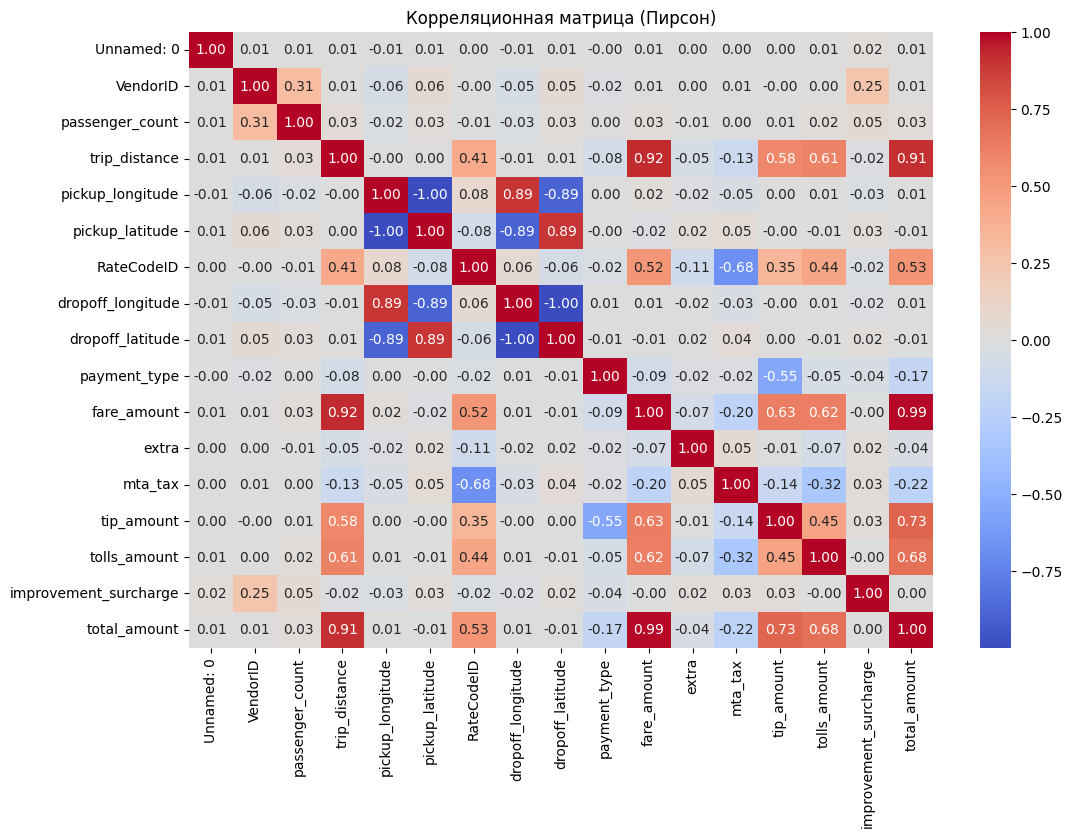

In [25]:
# Визуализация корреляционной матрицы для Пирсона
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица (Пирсон)")
#plt.show()
plt.savefig('pearson.png')

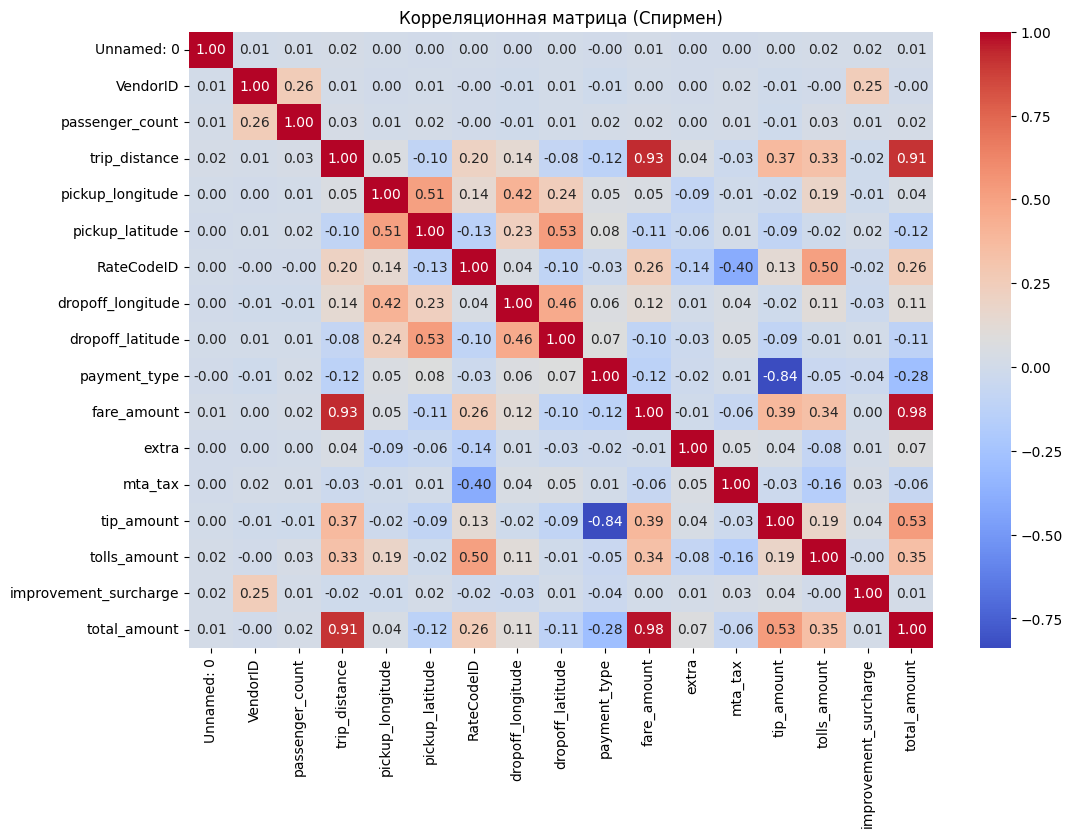

In [26]:
# Визуализация корреляционной матрицы для Спирмена
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица (Спирмен)")
#plt.show()
plt.savefig('spearman.png')

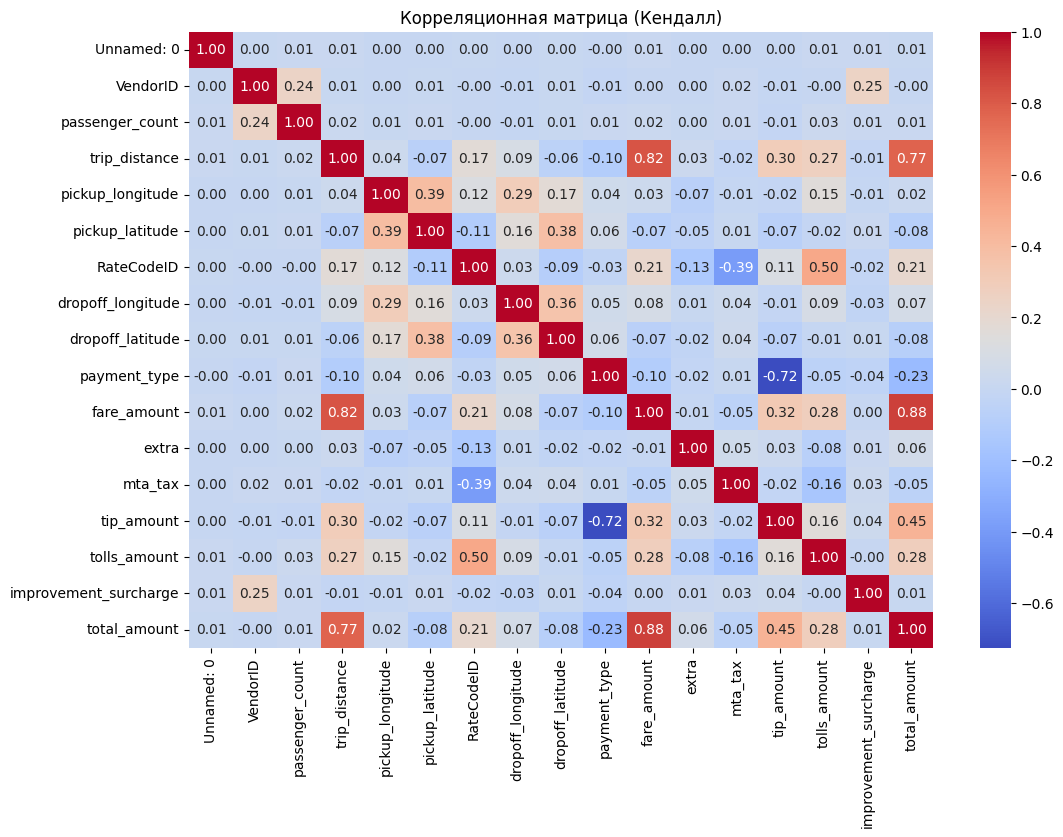

In [27]:
# Визуализация корреляционной матрицы для Кендалла
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица (Кендалл)")
plt.show()
#plt.savefig('kandall.png')

In [28]:
#Расчет корреляции между двумя переменными
var1 = 'total_amount'
var2 = 'trip_distance'

pearson_corr = numeric_columns[var1].corr(numeric_columns[var2], method='pearson')
spearman_corr = numeric_columns[var1].corr(numeric_columns[var2], method='spearman')
kendall_corr = numeric_columns[var1].corr(numeric_columns[var2], method='kendall')

print(f"Корреляция между {var1} и {var2}:")
print(f"Пирсон: {pearson_corr:.2f}")
print(f"Спирмен: {spearman_corr:.2f}")
print(f"Кендалл: {kendall_corr:.2f}")

Корреляция между total_amount и trip_distance:
Пирсон: 0.91
Спирмен: 0.91
Кендалл: 0.77


In [29]:
#Расчет корреляции между двумя переменными
var1 = 'fare_amount'
var2 = 'passenger_count'

pearson_corr = numeric_columns[var1].corr(numeric_columns[var2], method='pearson')
spearman_corr = numeric_columns[var1].corr(numeric_columns[var2], method='spearman')
kendall_corr = numeric_columns[var1].corr(numeric_columns[var2], method='kendall')

print(f"Корреляция между {var1} и {var2}:")
print(f"Пирсон: {pearson_corr:.2f}")
print(f"Спирмен: {spearman_corr:.2f}")
print(f"Кендалл: {kendall_corr:.2f}")

Корреляция между fare_amount и passenger_count:
Пирсон: 0.03
Спирмен: 0.02
Кендалл: 0.02


#### 3 Задание ДАТАСЕТ 2

In [30]:
from scipy.stats import chi2_contingency
def chi2f(var1, var2):
    # Создание таблицы сопряженности
    contingency_table = pd.crosstab(df_2[var1], df_2[var2])
    
    # Хи-квадрат тест
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("Хи-квадрат тест:")
    print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}, dof: {dof}")
    if p < 0.05:
        print(f"Связь между {var1} и {var2} значима.")
    else:
        print(f"Нет значимой связи между {var1} и {var2}.")

In [31]:
chi2f('Sleep_Quality', 'Health_Risk_Level')
chi2f('Gender', 'Health_Risk_Level')

Хи-квадрат тест:
Chi2: 50.13, p-value: 0.0000, dof: 4
Связь между Sleep_Quality и Health_Risk_Level значима.
Хи-квадрат тест:
Chi2: 0.80, p-value: 0.6719, dof: 2
Нет значимой связи между Gender и Health_Risk_Level.


In [32]:
from scipy.stats import fisher_exact

def fisher(var1, var2):
    if contingency_table.shape == (2, 2):
        oddsratio, p_value = fisher_exact(contingency_table)
        print("Точный тест Фишера:")
        print(f"p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"Связь между {var1} и {var2} значима.")
        else:
            print(f"Нет значимой связи между {var1} и {var2}.")
    else:
        print("Таблица не 2x2, точный тест Фишера неприменим.")

In [33]:
df_2_filtered = df_2[df_2.Mood.isin(['Happy','Stressed'])]
contingency_table = pd.crosstab(df_2_filtered['Mood'], df_2_filtered['Gender'])


fisher('Mood', 'Gender')

Точный тест Фишера:
p-value: 0.2497
Нет значимой связи между Mood и Gender.


In [34]:
np.random.seed(1)
df_2_mini = df_2_filtered.sample(100)
contingency_table = pd.crosstab(df_2_mini['Mood'], df_2_mini['Gender'])

fisher('Mood', 'Gender')

Точный тест Фишера:
p-value: 0.6686
Нет значимой связи между Mood и Gender.


In [35]:
np.random.seed(3)
df_2_mini = df_2_filtered.sample(100)
df_2_ff = df_2_mini[df_2_mini.Health_Risk_Level.isin(['High','Low'])]
df_2_f = df_2_ff[df_2_ff.Sleep_Quality.isin(['Moderate','Poor'])]

contingency_table = pd.crosstab(df_2_f['Sleep_Quality'], df_2_f['Health_Risk_Level'])

fisher('Sleep_Quality', 'Heath_Risk_Level')

Точный тест Фишера:
p-value: 0.0300
Связь между Sleep_Quality и Heath_Risk_Level значима.


In [36]:
from statsmodels.stats.contingency_tables import mcnemar
def mcnem(var1, var2):
    result = mcnemar(mcnemar_table, exact=True)
    print("Тест МакНемара:")
    print(f"p-value: {result.pvalue:.4f}")
    if result.pvalue < 0.05:
        print(f"Признаки {var1}, {var2} зависимы.")
    else:
        print(f"Признаки {var1}, {var2} независимы.")

In [37]:
df_2_bin = df_2.copy()
df_2_bin['SLB_Bin'] = df_2_bin['Stress_Level_Biosensor'].apply(lambda x: 1 if x > df_2_bin['Stress_Level_Biosensor'].mean() else 0)
df_2_bin['HRL_Bin'] = df_2_bin['Health_Risk_Level'].apply(lambda x: 1 if x in ['High'] else 0)


mcnemar_table = pd.crosstab(df_2_bin['SLB_Bin'], df_2_bin['HRL_Bin'])

mcnem('Stress_Level_Biosensor','HRL_Bin')

Тест МакНемара:
p-value: 0.0000
Признаки Stress_Level_Biosensor, HRL_Bin зависимы.


In [38]:
df_2_bin['SH_Bin'] = df_2_bin['Study_Hours'].apply(lambda x: 1 if x > df_2_bin['Study_Hours'].mean() else 0)
df_2_bin['PH_Bin'] = df_2_bin['Project_Hours'].apply(lambda x: 1 if x > df_2_bin['Project_Hours'].mean() else 0)
mcnemar_table = pd.crosstab(df_2_bin['SH_Bin'], df_2_bin['PH_Bin'])

mcnem('Study_Hours','Project_Hours')

Тест МакНемара:
p-value: 0.3094
Признаки Study_Hours, Project_Hours независимы.


In [39]:
#df_2_bin.to_csv('student_health_data_bin.csv')

In [40]:
df_2_bin.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours,SLB_Bin,HRL_Bin,SH_Bin,PH_Bin
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368,0.493000,0.138000,0.509000,0.485000
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624,0.500201,0.345073,0.500169,0.500025
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503,0.000000,0.000000,0.000000,0.000000
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873,0.000000,0.000000,1.000000,0.000000
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167,1.000000,0.000000,1.000000,1.000000
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325,1.000000,1.000000,1.000000,1.000000


In [41]:
from statsmodels.stats.contingency_tables import StratifiedTable

# Создание стратифицированных таблиц для каждого уровня passenger_count
strata = []
for level in df_2_bin['Mood'].unique():
    sub_df = df_2_bin[df_2_bin['Mood'] == level]
    table = pd.crosstab(sub_df['SLB_Bin'], sub_df['Gender'])
    if table.shape == (2, 2):  # Только для 2x2 таблиц
        strata.append(table.values)

# Тест CMH
if strata:
    cmh_test = StratifiedTable(strata).test_null_odds()
    print("Тест Кохрана-Мантеля-Хензеля:")
    print(f"p-value: {cmh_test.pvalue:.4f}")
    if cmh_test.pvalue < 0.05:
        print("Есть значимая связь между SLB_Bin и Gender с учетом Mood.")
    else:
        print("Нет значимой связи между SLB_Bin и Gender с учетом Mood.")
else:
    print("Недостаточно данных для стратифицированного анализа.")

Тест Кохрана-Мантеля-Хензеля:
p-value: 0.1075
Нет значимой связи между SLB_Bin и Gender с учетом Mood.


#### 4. Задание
Проверить наличие мультиколлинеарности в данных с помощью
корреляционной матрицы и фактора инфляции дисперсии.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

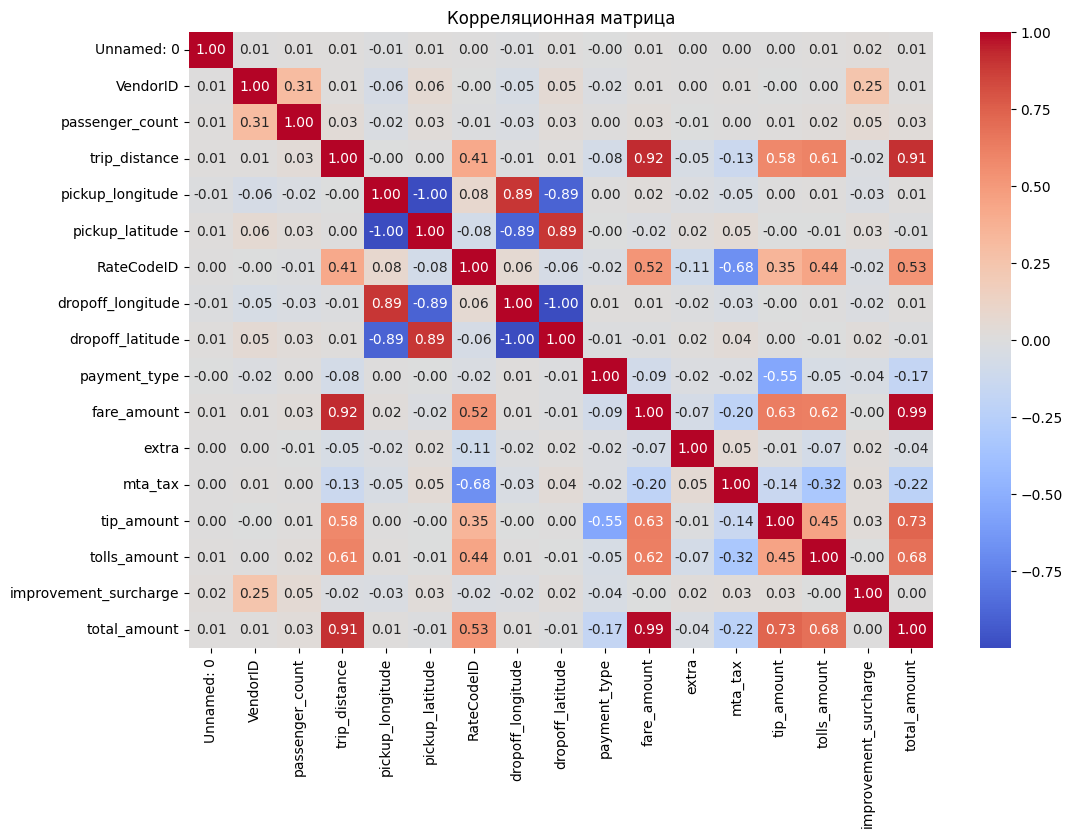

In [43]:
# Рассчитаем корреляционную матрицу
correlation_matrix = numeric_columns.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [44]:
# Функция для расчета VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [
        variance_inflation_factor(data.values, i) for i in range(data.shape[1])
    ]
    return vif_data

# Расчет VIF
vif_result = calculate_vif(numeric_columns)

print("Фактор инфляции дисперсии (VIF):")
print(vif_result)

Фактор инфляции дисперсии (VIF):
                  feature           VIF
0              Unnamed: 0  4.027399e+00
1                VendorID  1.196297e+01
2         passenger_count  2.854269e+00
3           trip_distance  1.202473e+01
4        pickup_longitude  2.121007e+06
5         pickup_latitude  2.120637e+06
6              RateCodeID  2.118271e+01
7       dropoff_longitude  1.409546e+06
8        dropoff_latitude  1.409753e+06
9            payment_type  1.478516e+01
10            fare_amount  1.586700e+05
11                  extra  1.459738e+02
12                mta_tax  4.008323e+02
13             tip_amount  4.732711e+03
14           tolls_amount  1.128683e+03
15  improvement_surcharge  1.737919e+01
16           total_amount  2.437272e+05


#### 5 Задание 2 датасет

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
groups = [df_2[df_2['Health_Risk_Level'] == mood]['Heart_Rate'] for mood in df_2['Health_Risk_Level'].unique()]

ks_stat, ks_p = stats.kstest(df_2.Heart_Rate, 'norm', args=(np.mean(df_2.Heart_Rate), np.std(df_2.Heart_Rate)))
print(f"Kolmogorov-Smirnov test: Stat={ks_stat}, p-value={ks_p}")

Kolmogorov-Smirnov test: Stat=0.017552811219013913, p-value=0.9121818818995483


In [47]:
levene_test = stats.levene(*groups)
print("Тест Левена на равенство дисперсий:")
print(f"Statistic: {levene_test.statistic:.2f}, p-value: {levene_test.pvalue:.4f}")

if levene_test.pvalue < 0.05:
    print("Предположение о равенстве дисперсий нарушено.")
else:
    print("Предположение о равенстве дисперсий выполнено.")

Тест Левена на равенство дисперсий:
Statistic: 0.07, p-value: 0.9326
Предположение о равенстве дисперсий выполнено.


In [48]:
# Однофакторный дисперсионный анализ (ANOVA)
anova_result = stats.f_oneway(*groups)
print("\nРезультаты ANOVA:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Значимые различия между группами Health_Risk_Level по Heart_Rate.")
else:
    print("Нет значимых различий между группами Health_Risk_Level по Heart_Rate.")


Результаты ANOVA:
F-statistic: 0.67, p-value: 0.5130
Нет значимых различий между группами Health_Risk_Level по Heart_Rate.


In [49]:
# Многофакторный ANOVA

formula = 'Heart_Rate~ C(Mood) + C(Sleep_Quality)'
model = ols(formula, data=df_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nМногофакторный ANOVA:")
print(anova_table)



Многофакторный ANOVA:
                        sum_sq     df         F    PR(>F)
C(Mood)              34.118499    2.0  0.187089  0.829399
C(Sleep_Quality)    250.576767    2.0  1.374036  0.253563
Residual          90726.848812  995.0       NaN       NaN


#### 5 Задание

In [50]:
data = trips_per_day

group_1 = data[data['date'].dt.day <= 15]['trip_count']
group_2 = data[data['date'].dt.day > 15]['trip_count']

groups  = [group_1, group_2]

# Проверка предпосылок: равенство дисперсий
levene_test = stats.levene(*groups)
print("Тест Левена на равенство дисперсий:")
print(f"Statistic: {levene_test.statistic:.2f}, p-value: {levene_test.pvalue:.4f}")

if levene_test.pvalue < 0.05:
    print("Предположение о равенстве дисперсий нарушено.")
else:
    print("Предположение о равенстве дисперсий выполнено.")


# Однофакторный дисперсионный анализ (ANOVA)
anova_result = stats.f_oneway(*groups)
print("\nРезультаты ANOVA:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Значимые различия между группами VendorID по fare_amount.")
else:
    print("Нет значимых различий между группами VendorID по fare_amount.")


# Многофакторный ANOVA с использованием statsmodels
# Пример: влияние VendorID и payment_type на fare_amount
df = pd.read_csv('cut_taxi_dataset10000.csv')
formula = 'fare_amount ~ C(VendorID) + C(payment_type)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nМногофакторный ANOVA:")
print(anova_table)

Тест Левена на равенство дисперсий:
Statistic: 1.01, p-value: 0.3231
Предположение о равенстве дисперсий выполнено.

Результаты ANOVA:
F-statistic: 0.23, p-value: 0.6324
Нет значимых различий между группами VendorID по fare_amount.

Многофакторный ANOVA:
                       sum_sq      df          F        PR(>F)
C(VendorID)      1.358262e+02     1.0   1.356732  2.441324e-01
C(payment_type)  8.530248e+03     3.0  28.402147  2.795446e-18
Residual         1.000627e+06  9995.0        NaN           NaN
